### Feature Engineering and Data Cleaning

주어진 데이터셋은 중요한 특징도 있고 그렇지 않은 특징도 있습니다.

다른 특징으로부터 정보를 탐색하고 추출하여 새로운 features를 얻거나 추가할 수도 있습니다.

이렇게 features를 다루는 과정이므로 매우 중요합니다.

#### Age_band

- Age

   - continous feature

   - Continous Variables는 ML모데링서 문제

   - 이유: 다양한 나이대.

   - 해결: continous values to categorical values

   - 사용: Binning , Normalisation

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('./input/train.csv')

In [4]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band'] = 3
data.loc[data['Age']>64,'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [5]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r') #각 나이대의 승객 수

,Age_band
1,346
0,277
2,188
3,69
4,11


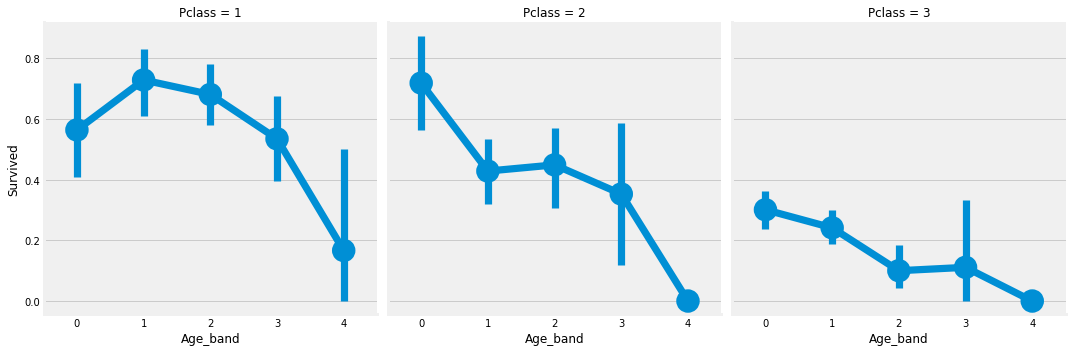

In [6]:
sns.factorplot('Age_band','Survived',data=data, col='Pclass')
plt.show()


나이대가 높을수록 생존율이 떨어집니다

#### Family_Size and Alone

- 새로운 특징 창조하여 분석하기

- 가족 단위별 생존율 체크

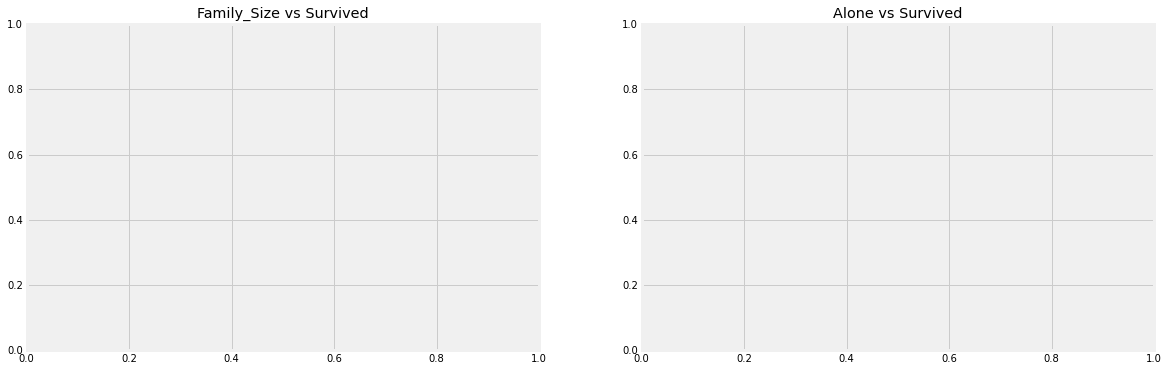

In [9]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

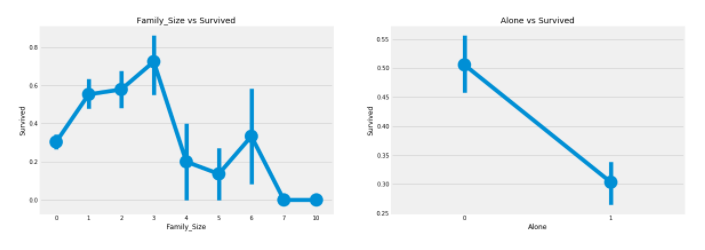

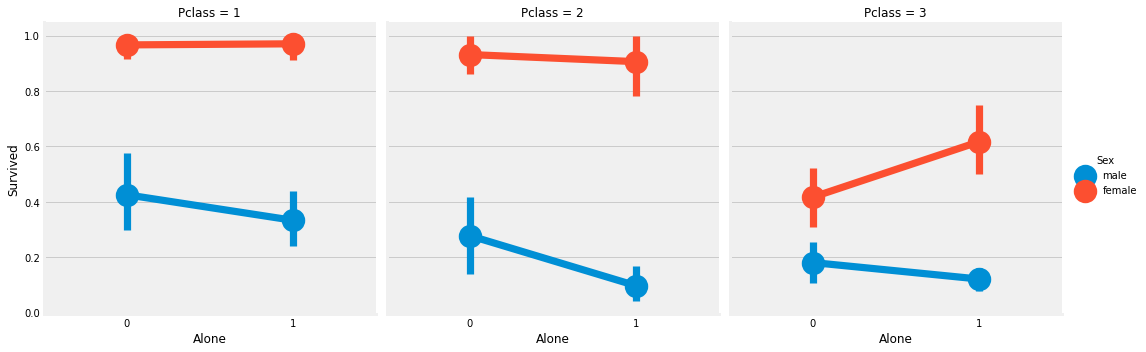

In [10]:
sns.factorplot('Alone','Survived',data=data, hue='Sex',col='Pclass')
plt.show()

#### Fare_Range

- fare is continous feature

- pandas.qcut

- fare_ranges가 증가하면 생존율도 증가한다.

In [11]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [12]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91,'Fare_cat'] = 0 
data.loc[(data['Fare']>7.91) &(data['Fare']<=14.454),'Fare_cat'] =1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat'] = 2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3


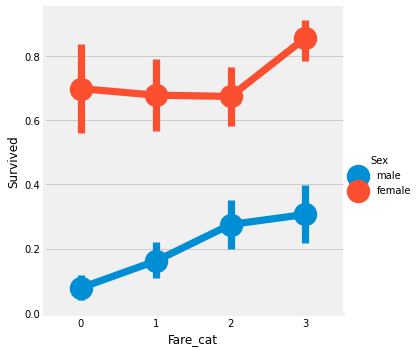

In [13]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

#### Converting String Values into Numeric




In [15]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)



#### Dropping UnNeeded Features

Name--> We don't need name feature as it cannot be converted into any categorical value.

Age--> We have the Age_band feature, so no need of this.

Ticket--> It is any random string that cannot be categorised.

Fare--> We have the Fare_cat feature, so unneeded

Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

Fare_Range--> We have the fare_cat feature.

PassengerId--> Cannot be categorised

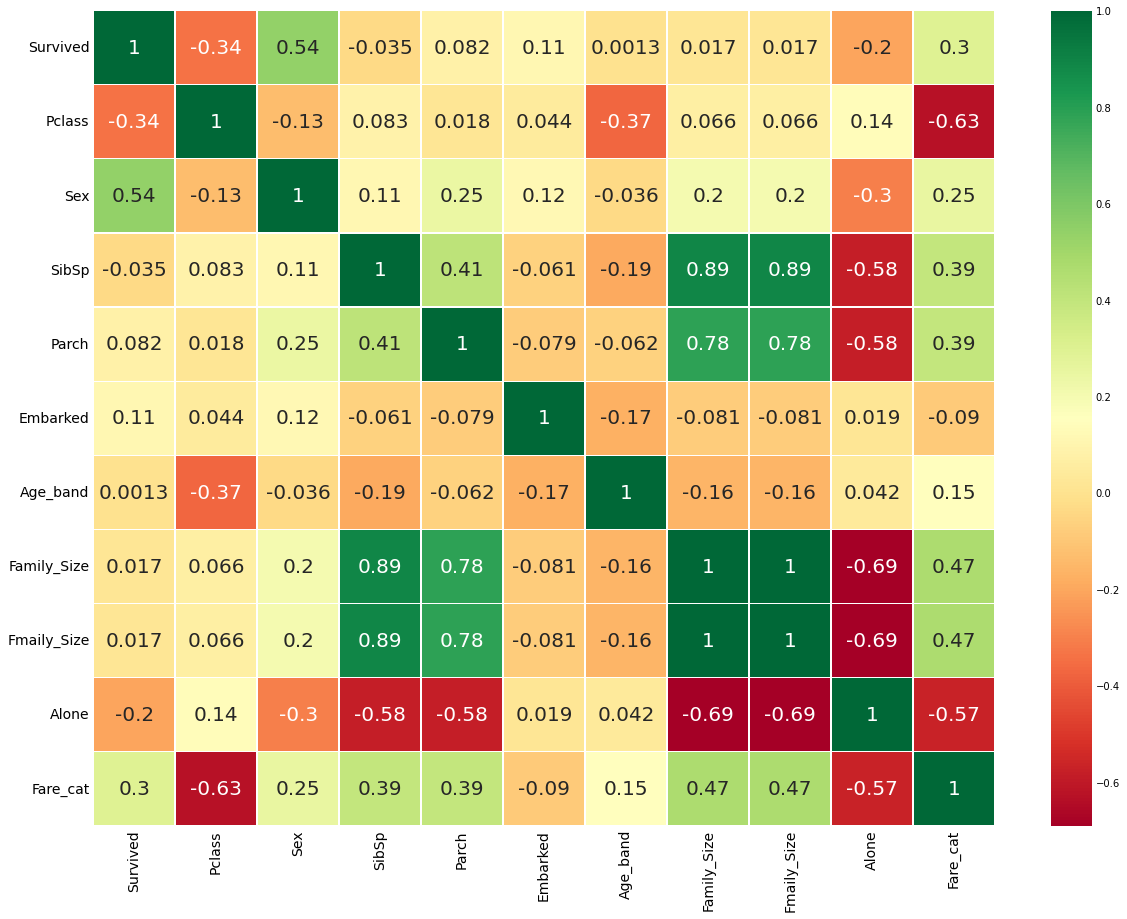

In [16]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True, cmap='RdYlGn', linewidth=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()